In [16]:
import os
import numpy as np
from PIL import Image
from sklearn.model_selection import train_test_split
from keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D
from keras.preprocessing.image import img_to_array, load_img
from keras.callbacks import EarlyStopping

In [1]:
!pip3 install pandas


[notice] A new release of pip is available: 23.1.2 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [17]:
# Input image dimensions
img_width, img_height = 240, 240

In [18]:
positives_path = 'D:\Weapon Detection Project DRDO\KnivesImagesDatabase\POSITIVES_ALL'

In [19]:
negatives_path = 'D:\\Weapon Detection Project DRDO\KnivesImagesDatabase\\NEGATIVES_ALL'

In [20]:
# Class labels
classes = ['knife', 'no_knife']
x = []
y = []

In [21]:
# Load positive images (with knives)
print("Loading positive images...")
for img in os.listdir(positives_path):
    try:
        im = Image.open(os.path.join(positives_path, img))
        im = im.convert(mode='RGB')
        imrs = im.resize((img_width, img_height))
        imrs = img_to_array(imrs)
        x.append(imrs)
        y.append(0)  # Label for knives
    except Exception as e:
        print(f"Error processing image {img}: {e}")

Loading positive images...


In [22]:
# Load negative images (without knives)
print("Loading negative images...")
for img in os.listdir(negatives_path):
    try:
        im = Image.open(os.path.join(negatives_path, img))
        im = im.convert(mode='RGB')
        imrs = im.resize((img_width, img_height))
        imrs = img_to_array(imrs)
        x.append(imrs)
        y.append(1)  # Label for no knives
    except Exception as e:
        print(f"Error processing image {img}: {e}")

Loading negative images...


In [23]:
# Convert lists to numpy arrays for Keras
x = np.array(x)
y = np.array(y)

In [24]:
# Normalize pixel values to between 0 and 1
x = x / 255.0

In [25]:
# Convert labels to categorical one-hot encoding
y = to_categorical(y, num_classes=2)

In [26]:
# Split the data into training and test sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [27]:
# Build your model
model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(img_width, img_height, 3)))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(Dense(2, activation='softmax'))  # Output layer with 2 classes: knife or no_knife

c:\Users\PRACHI TEWARI\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [28]:
# Compile the model
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [14]:
# Define early stopping to prevent overfitting
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

In [15]:
# Train the model
model.fit(x_train, y_train, batch_size=32, epochs=20,
          validation_data=(x_test, y_test),
          callbacks=[early_stopping])

Epoch 1/20
323/323 ━━━━━━━━━━━━━━━━━━━━ 308s 934ms/step - accuracy: 0.7145 - loss: 0.5849 - val_accuracy: 0.8000 - val_loss: 0.4103
Epoch 2/20
323/323 ━━━━━━━━━━━━━━━━━━━━ 272s 842ms/step - accuracy: 0.8421 - loss: 0.3531 - val_accuracy: 0.8550 - val_loss: 0.3367
Epoch 3/20
323/323 ━━━━━━━━━━━━━━━━━━━━ 264s 816ms/step - accuracy: 0.8877 - loss: 0.2561 - val_accuracy: 0.8756 - val_loss: 0.3097
Epoch 4/20
323/323 ━━━━━━━━━━━━━━━━━━━━ 259s 801ms/step - accuracy: 0.9273 - loss: 0.1837 - val_accuracy: 0.9093 - val_loss: 0.2372
Epoch 5/20
323/323 ━━━━━━━━━━━━━━━━━━━━ 259s 801ms/step - accuracy: 0.9503 - loss: 0.1268 - val_accuracy: 0.9031 - val_loss: 0.2580
Epoch 6/20
323/323 ━━━━━━━━━━━━━━━━━━━━ 256s 794ms/step - accuracy: 0.9690 - loss: 0.0804 - val_accuracy: 0.9070 - val_loss: 0.2950
Epoch 7/20
323/323 ━━━━━━━━━━━━━━━━━━━━ 460s 1s/step - accuracy: 0.9827 - loss: 0.0503 - val_accuracy: 0.9124 - val_loss: 0.3219
Epoch 8/20
323/323 ━━━━━━━━━━━━━━━━━━━━ 267s 825ms/step - accuracy: 0.9881 - lo

In [35]:
score = model.evaluate(x_test, y_test, verbose=0)
print(f'Test loss: {score[0]}')
print(f'Test accuracy: {score[1]}')

Test loss: 0.2371855229139328
Test accuracy: 0.9093023538589478


In [36]:
model.save('new_knife_detection_model.h5')

In [29]:
from keras.models import load_model
from keras.preprocessing.image import load_img, img_to_array
from keras.applications.resnet50 import preprocess_input
import numpy as np

In [30]:
import numpy as np
from keras.models import load_model
from keras.preprocessing.image import img_to_array, load_img
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Load the trained model
model = load_model(r"D:\Weapon Detection Project DRDO\new_knife_detection_model.h5")

In [31]:
# Evaluate the model
test_loss, test_accuracy = model.evaluate(x_test, y_test)
print(f'Test Accuracy: {test_accuracy:.4f}')
print(f'Test Loss: {test_loss:.4f}')

107/107 ━━━━━━━━━━━━━━━━━━━━ 46s 395ms/step - accuracy: 0.8306 - loss: 0.5892
Test Accuracy: 0.8292
Test Loss: 0.5405


In [33]:
# Predict and print confusion matrix and classification report
y_pred = model.predict(x_test)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true = np.argmax(y_test, axis=1)

107/107 ━━━━━━━━━━━━━━━━━━━━ 42s 383ms/step


In [35]:
conf_matrix = confusion_matrix(y_true, y_pred_classes)
class_report = classification_report(y_true, y_pred_classes, target_names=['knife', 'no_knife'])

In [36]:
print('Confusion Matrix:')
print(conf_matrix)
print('\nClassification Report:')
print(class_report)

Confusion Matrix:
[[ 957  558]
 [  23 1864]]

Classification Report:
              precision    recall  f1-score   support

       knife       0.98      0.63      0.77      1515
    no_knife       0.77      0.99      0.87      1887

    accuracy                           0.83      3402
   macro avg       0.87      0.81      0.82      3402
weighted avg       0.86      0.83      0.82      3402



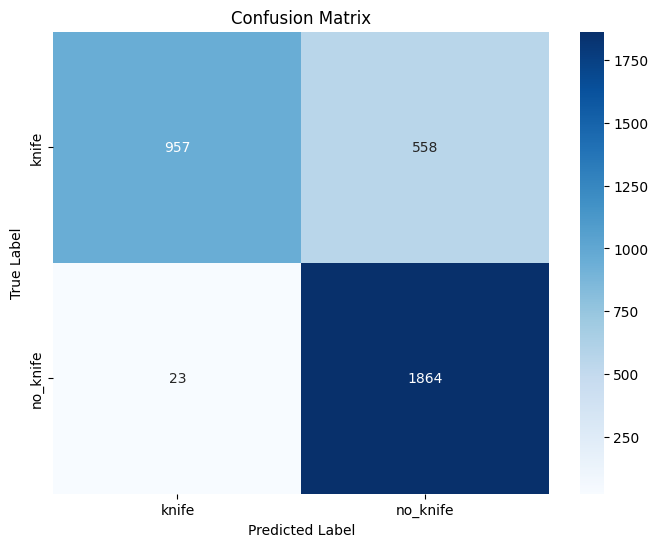

In [37]:
# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['knife', 'no_knife'], yticklabels=['knife', 'no_knife'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

In [42]:
import numpy as np
from keras.models import load_model
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc, precision_recall_curve
import matplotlib.pyplot as plt
import seaborn as sns

In [43]:
# ROC Curve
fpr, tpr, _ = roc_curve(y_true, y_pred_classes)
roc_auc = auc(fpr, tpr)

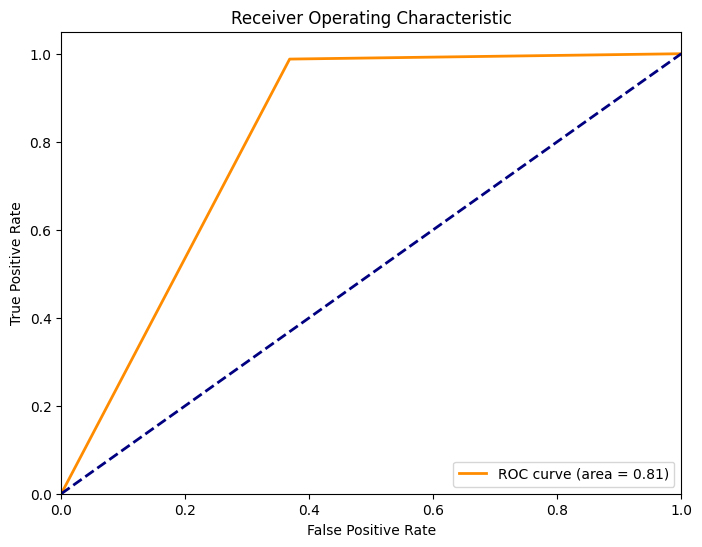

In [44]:
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc='lower right')
plt.show()

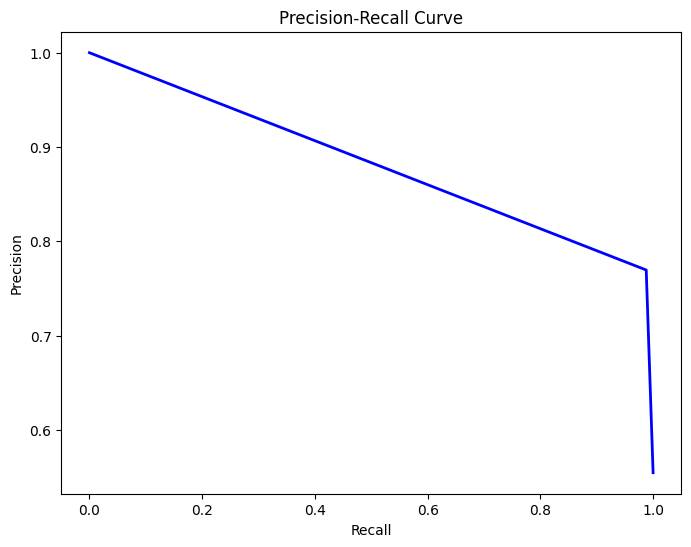

In [45]:
# Precision-Recall Curve
precision, recall, _ = precision_recall_curve(y_true, y_pred_classes)

plt.figure(figsize=(8, 6))
plt.plot(recall, precision, color='blue', lw=2)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.show()